# HW5.1 text classification with logistic regression. 

We will use the same dataset Triage as last time. Here is what's in this assignment: 

1. we will explore several options of how to convert text to vectors to be fed into a logistic regression classifier using sklearn. 
2. we will implement and train a logistic regression classifier using Python (no sklearn!).
3. we will compare the text classification result with those you got from the NB last week. 

## PART I: text input representation: converting text to vectors

There are many ways to convert text to vectors. Let's try two ways in this assignment. 

1. Count vectors 

Read the documentation for sklearn ```CountVectorizer``` here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform 

2. Normalized counts - tfidf

Read the documentation for sklearn ```tfidfVectorizer``` here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

Make sure you understood the code examples for those two vectorizers. 



### logistic regression with unigram count vectors


In [1]:
# This example shows how to convert text to Count vectors. When you use get_feature_names_out() function,
# you can see which position of the vector correspond to which word in the vocabulary. 
# but usually we don't need to pay too much attention to that. 

from sklearn.feature_extraction.text import CountVectorizer

corpus = ['this is the first document',
          'this document is the second document',
          'and this is the third one',
          'is this the first document',
          'how about these documents']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

print(X.toarray())

['about' 'and' 'document' 'documents' 'first' 'how' 'is' 'one' 'second'
 'the' 'these' 'third' 'this']
[[0 0 1 0 1 0 1 0 0 1 0 0 1]
 [0 0 2 0 0 0 1 0 1 1 0 0 1]
 [0 1 0 0 0 0 1 1 0 1 0 1 1]
 [0 0 1 0 1 0 1 0 0 1 0 0 1]
 [1 0 0 1 0 1 0 0 0 0 1 0 0]]


#### you turn: read the Triage dataset using the same loader from last time, and convert your text documents into a count vector. 

In [2]:
# similar to the example above, your document 
from util import load_data, Dataset, Example
import numpy as np
dataset = load_data("./data/triage")


def get_data(split:list[Example])->(list[str],list[int]):
    """
    massage the data into a format consistent with the input type required by CountVectorizer or tfidfVectorizer. 

    args 
        split: pass in the split, which should be either dataset.train or dataset.dev

    returns: 
        text: list of sentences
        labels: list of labels  

    """
    # YOUR CODE HERE
    # pass 
    text = list()
    label = list()
    
    for doc in split:
        text.append(doc.words)
        label.append(doc.label)
        
    text = [[' '.join(i)][0] for i in text] # each element is a string
    
    return text, label

#### load the data using get_data() and then convert them into count vector
```
train_text, train_label = get_data(dataset.train)
dev_text, dev_label = get_data(dataset.dev)
```

#### IMPORTANT note: 
You need to transform both train and dev data into a vector before feeding them into a classifier. But ```fit_transform()``` is a composition of two functions: fit and transform. 
You should use ```fit_transform()``` to fit the vector to your train text and transform it to the vector,
but when you deal with the dev text, you don't need to fit the Vectorizer any more, you just need to use the 
Vectorizer you fit on the train data, and simply ```transform()``` it. Don't use ```fit_transform()``` on both data splits. 
To confirm that you are using the same Vectorizer for both train data and test data, you should get the feature names out
and see that they have the same length. 
e.g., : 

```
names=vectorizer.get_feature_names_out()
print(len(names))
```

Because the train and dev split have different vocabulary sizes, if you ```fit_transform``` on each of them you will end up with vectors of different lengths. Since your classifier is trained with the input vector length from train, it should not take input with a different vector length on the dev data. 

In [3]:
# YOUR CODE HERE to convert both train and dev data into Count vectors

train_text, train_label = get_data(dataset.train)
dev_text, dev_label = get_data(dataset.dev)

vectorizer = CountVectorizer()
vectorized_train_text = vectorizer.fit_transform(train_text)
vectorized_dev_text = vectorizer.transform(dev_text)

names = vectorizer.get_feature_names_out()
print(len(names)) # 31211
print(vectorized_train_text.shape)
print(vectorized_dev_text.shape)

31211
(21046, 31211)
(2573, 31211)


## logistic regression with bigram count vectors

When using the CountVectorizer, you can also use bigram or Ngram counts. If you read the documentation for  ```CountVectorizer``` above, you will find the argument called ```ngram_range```. Try to use both unigrams and bigrams for this task. 

In [4]:
# Code to apply CountVectorizer using unigrams and bigrams
# YOUR CODE HERE

vectorizer = CountVectorizer(ngram_range=(1,2)) # min_n = 1, max_n = 2
vectorized_train_text = vectorizer.fit_transform(train_text)
vectorized_dev_text = vectorizer.transform(dev_text)

names = vectorizer.get_feature_names_out()
print(len(names)) # 243689
print(vectorized_train_text.shape)
print(vectorized_dev_text.shape)

243689
(21046, 243689)
(2573, 243689)


## logistic regression with tfidf vectors

In [5]:
# Refer to the tfidfVectorizer linked above to transform the text into tfidf vectors
# YOUR CODE HERE

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorized_train_text = vectorizer.fit_transform(train_text)
vectorized_dev_text = vectorizer.transform(dev_text)

# After you have transformed your text (train and dev) into tfidf vectors, try to get the names of 
# the vector elements at each position and print out the length of the vector. Inspect the names of
# the vectors from different portions of the vector. What do you see in the vocabulary?

In [6]:
names = vectorizer.get_feature_names_out()
print(len(names))

31211


In [7]:
# first portion
names[:20]

array(['00', '000', '0000', '000ha', '000l', '000lt', '000m2', '000rmb',
       '004', '00h58', '01', '010', '017', '018', '019', '01st', '02',
       '020', '027', '027kiisfm'], dtype=object)

In [8]:
# middle portion
names[len(names)//2:len(names)//2+20]

array(['khatami', 'khatir', 'khatlon', 'khattak', 'khatun', 'khaw',
       'khdara', 'kheda', 'khel', 'khiar', 'khichudi', 'khilgaon', 'khim',
       'khima', 'khmer', 'khojai', 'khorak', 'khorezm', 'khorizem',
       'khorog'], dtype=object)

In [9]:
# last portion
names[-20:]

array(['zwkmjkkz', '枚tanos', '眉an', '眉aram', '眉ei', '眉hurricane', '眉lol',
       '眉the', '眉this', '碌es', '脿枚', '脿枚else', '脿枚r', '脿毛', '脿毛ng', '脿没',
       '脿眉', '茅tant', '茅tat', '茅t茅'], dtype=object)

By inspecting different portions of the names vector, it appears that names are all unique terms extracted from the original corpus, and they are sorted in alphabetical order, with non-English words at the end.

# PART II: Logistic regression from scratch

We have seen in class there are four components in a standard linear classifier: features (input), forward pass (function to compute p(Y|X)), a loss function (to measure the errors the system makes), and the optimizer/iterative learning process to adjust the weights to minimize the errors. We've already taken care of the input features above. Let's now implement the rest of the components. Let's use the tfidf vectors for this implemetation.

Recipe: 
```
   1. Initialize the parameters
Repeat {
   2. Make a prediction y_hat
   3. Calculate loss function
   4. Get gradient for loss function
   5. Update parameters W, b
 }
```

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# create train and test sets. train_label and dev_label was created above.
# the Xtrain and Xtest should be the result variable of passing the train_text and dev_text through the vectorizer. 

vectorizer = TfidfVectorizer()
vectorized_train_text = vectorizer.fit_transform(train_text)
vectorized_dev_text = vectorizer.transform(dev_text)

Xtrain, Xtest = vectorized_train_text, vectorized_dev_text
Ytrain = np.array(train_label)
Ytest = np.array(dev_label)

# randomly initialize weights
D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0 # bias term

# make predictions
def sigmoid(z):
    """
    sigmoid function
    
    args
        z: the result of linear computation, z = X.dot(W) + b
    """
    # YOUR CODE HERE 
    return 1 / (1 + np.exp(-z))

def forward(X, W, b):
    """
    forward pass, return the result of passing X.dot(W)+b through sigmoid function

    args
        X: input features
        W: weights
        b: biases
    """
    # YOUR CODE HERE 
    return sigmoid(X.dot(W) + b) # can not use np.dot(X, W) - unable to allocate

# calculate the accuracy
def classification_rate(Y, Y_HAT):
    return np.mean(Y == Y_HAT)

# cross entropy
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

# train loop

# use these lists to store the loss values during the training, so you can visualize them later in a curve
train_loss = [] 
test_loss = []

learning_rate = 0.001
num_iter = 10000 # iterate this many times to update the weights
for i in range(num_iter):
    # YOUR CODE HERE
    # implement forward pass, compute loss with cross entropy, 
    # and finally update your weights and biases (W and b)
    # by the rules:     
    # w = w - Learning_Rate*dw
    # b = b - Learning_Rate*db
    # where dw and db can be computed with something like this: (refer to SLP3 5.6.3, working through an example)
    # dw=X.T.dot(y_pred-y)
    # db=np.sum(y_pred-y)
    # you should capture your output in p_Ytrain and p_Ytest
    
    # forward pass
    p_Ytrain = forward(Xtrain, W, b)
    p_Ytest = forward(Xtest, W, b)
    
    # loss
    train_loss.append(cross_entropy(Ytrain, p_Ytrain))
    test_loss.append(cross_entropy(Ytest, p_Ytest))
    
    # gradients
    dW = Xtrain.T.dot(p_Ytrain - Ytrain)
    db = np.sum(p_Ytrain - Ytrain)
    
    # update
    W -= learning_rate * dW
    b -= learning_rate * db

Final train classification_rate: 0.9338116506699611
Final test classification_rate: 0.759813447337738


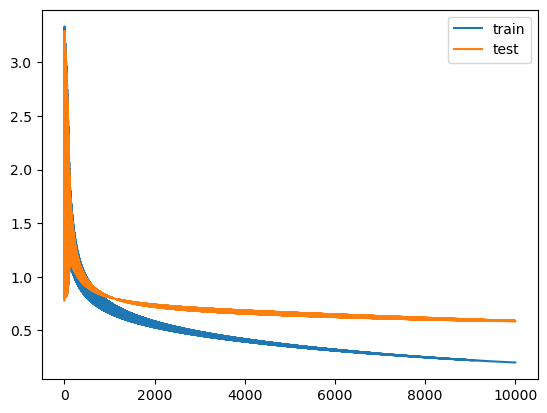

In [11]:
# evaluate your model after it is trained. What is the accuracy? 
print("Final train classification_rate:", classification_rate(Ytrain, np.round(p_Ytrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(p_Ytest)))

# finally plot the trajectory of the training curve 
legend1, = plt.plot(train_loss, label='train loss')
legend2, = plt.plot(test_loss, label='test loss')
plt.legend(["train", "test"])
plt.show()

# PART III: compare different vectors

Now substitute the tfidf vectors with the unigram, and unigram+bigram count vectors. Train the model again. How is the accuracy this time?

In [12]:
from sklearn.preprocessing import normalize
# address the "RuntimeWarning: overflow encountered in exp" issue
# alternative: from scipy.special import expit, expit(z)
# address the "RuntimeWarning: divide by zero encountered in log" issue
# alternative: in cross entropy function, pY = np.clip(pY, 1e-16, 1 - 1e-16)

Unigram count vectors:

Final train classification_rate: 0.800864772403307
Final test classification_rate: 0.7423241352506802


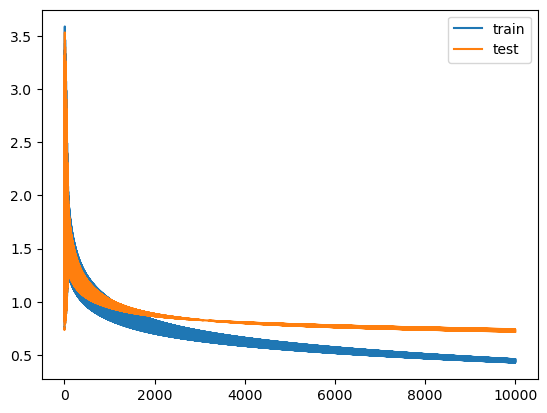

In [13]:
# YOUR CODE HERE

vectorizer = CountVectorizer() # Unigram count vectors
vectorized_train_text = vectorizer.fit_transform(train_text)
vectorized_dev_text = vectorizer.transform(dev_text)

Xtrain, Xtest = vectorized_train_text, vectorized_dev_text
Xtrain = normalize(Xtrain)
Xtest = normalize(Xtest)

# randomly initialize weights
D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0 # bias term

# train loop
train_loss = [] 
test_loss = []

learning_rate = 0.001
num_iter = 10000 # iterate this many times to update the weights
for i in range(num_iter):
    # forward pass
    p_Ytrain = forward(Xtrain, W, b)
    p_Ytest = forward(Xtest, W, b)
    
    # loss
    train_loss.append(cross_entropy(Ytrain, p_Ytrain))
    test_loss.append(cross_entropy(Ytest, p_Ytest))
    
    # gradients
    dW = Xtrain.T.dot(p_Ytrain - Ytrain)
    db = np.sum(p_Ytrain - Ytrain)
    
    # update
    W -= learning_rate * dW
    b -= learning_rate * db
    
print("Final train classification_rate:", classification_rate(Ytrain, np.round(p_Ytrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(p_Ytest)))

legend1, = plt.plot(train_loss, label='train loss')
legend2, = plt.plot(test_loss, label='test loss')
plt.legend(["train", "test"])
plt.show()

Unigram+bigram count vectors:

Final train classification_rate: 0.9778580252779625
Final test classification_rate: 0.7594247959580257


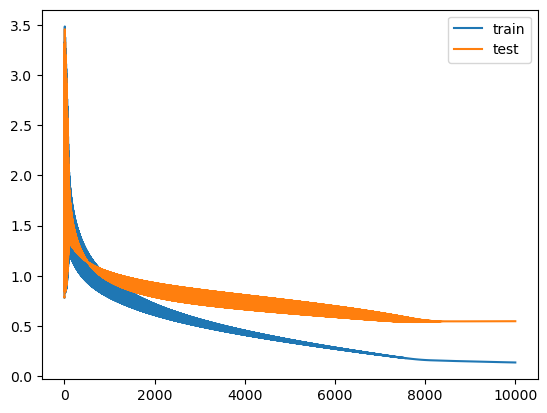

In [14]:
# YOUR CODE HERE

vectorizer = CountVectorizer(ngram_range=(1,2)) # Unigram+bigram count vectors
vectorized_train_text = vectorizer.fit_transform(train_text)
vectorized_dev_text = vectorizer.transform(dev_text)

Xtrain, Xtest = vectorized_train_text, vectorized_dev_text
Xtrain = normalize(Xtrain)
Xtest = normalize(Xtest)

# randomly initialize weights
D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0 # bias term

# train loop
train_loss = [] 
test_loss = []

learning_rate = 0.001
num_iter = 10000 # iterate this many times to update the weights
for i in range(num_iter):
    # forward pass
    p_Ytrain = forward(Xtrain, W, b)
    p_Ytest = forward(Xtest, W, b)
    
    # loss
    train_loss.append(cross_entropy(Ytrain, p_Ytrain))
    test_loss.append(cross_entropy(Ytest, p_Ytest))
    
    # gradients
    dW = Xtrain.T.dot(p_Ytrain - Ytrain)
    db = np.sum(p_Ytrain - Ytrain)
    
    # update
    W -= learning_rate * dW
    b -= learning_rate * db
    
print("Final train classification_rate:", classification_rate(Ytrain, np.round(p_Ytrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(p_Ytest)))

legend1, = plt.plot(train_loss, label='train loss')
legend2, = plt.plot(test_loss, label='test loss')
plt.legend(["train", "test"])
plt.show()

Compared to the model with tfidf vectors, the **model with unigram vectors** has slightly lower dev accuracy and much lower training accuracy while the **model with unigram+bigram vectors** has similar dev accuracy and even higher training accuracy. The **model with tfidf vectors** can capture the importance of terms as it considers both the term frequency and the inverse document frequency, and the **model with unigram+bigram count vectors** incorporates more information for including bigrams, so these two models are relatively more complicated than the **model with unigram vectors**, which is why these two models have extremely high training accuracies (over 90%), showing signs of overfitting. In addition, the dev accuracies of these two models are only about 2% higher than the dev accuracy of the model with unigram vectors, suggesting the **model with unigram vectors** is the more generalized model.

# wrapping up

You should see your training curve on your train data and dev data above. What do you observe? 

How does your final train and dev accuracy compare to using NaiveBayes model from last week?

The loss curves on train data and dev data demonstrate similar trajectories in these graphs in general. The losses decrease rapidly in the initial iterations as the model is learning to minimize the loss function, and then the losses become steady as training progresses. However, the decrease in training loss is more apparent compared to the loss obtained from dev data, this is because the model is learning more from the training data as the number of iterations increases. The test loss remains relatively stable, but the difference between training loss and test loss is increasing as training progresses, showing signs of overfitting (10,000 iterations may be higher than what is necessary). The difference between the three graphs is the rate of decrease. For the unigram+bigram count model, it takes more iterations for the loss to appear to stay at a constant value, which is expected because the model has more features, thus taking more iterations to train. 

All three models implemented this week have relatively higher dev accuracies than the **NaiveBayes model**. Both the **model with tfidf vectors** and the **model with unigram+bigram vectors** have much higher training accuracies than the NaiveBayes model, while the **model with unigram vectors** has a lower training accuracy. As a result, the **model with unigram vectors** is preferred as it is more generalized (training accuracy and dev accuracy are reasonable and more similar). The other two models are more complicated than NaiveBayes, they can learn much more from the training set and fit the training set very well, but maybe hyperparameter tuning for vectorizers and logistic regression models is needed to avoid overfitting and see a more significant increase in the accuracy on dev data. 